# Lecture et traitement d'images

ouverture des images

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

RGB1 = mpimg.imread("2020-05-29RGB.jpg")
B51 = mpimg.imread('2020-05-29B05.jpg')
B81 = mpimg.imread('2020-05-29B08.jpg')

RGB2 = mpimg.imread("2020-09-16RGB.jpg")
B52 = mpimg.imread('2020-09-16B05.jpg')
B82 = mpimg.imread('2020-09-16B08.jpg')

RGB3 = mpimg.imread("2021-01-19RGB.jpg")
B53 = mpimg.imread('2021-01-19B05.jpg')
B83 = mpimg.imread('2021-01-19B08.jpg')

RGB4 = mpimg.imread("2021-04-22RGB.jpg")
B54 = mpimg.imread('2021-04-22B05.jpg')
B84 = mpimg.imread('2021-04-22B08.jpg')


visionnage des images

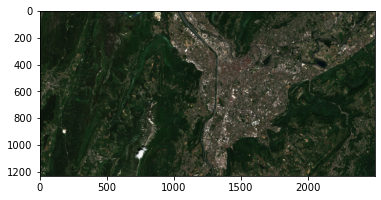

In [16]:
plt.imshow(RGB1)
plt.show()
plt.imshow(B51)
plt.show()

fonctions de traitement d'image
1) transormation en une matrice contenant toute les bandes spectrales

In [9]:
def multispectrale(RGB,B5,B8): # crée une image multispetrale à partir des bandes RGB plus des bandes B5 et B8 que nous avons sélectionnées
    multi = np.dstack((RGB,B5))
    multi = np.dstack((multi,B8))
    return np.vstack(multi) # la matrice obtenue est de dimension 2 après cette étape, avec en colonne les différentes bandes et en ligne les positions de l'image

2)application de l'ACP

In [10]:
def normalisation(M): #retourne une matrice centrée
    M1=np.copy(M)
    x,y=np.shape(M)
    somme=np.zeros(y)
    for j in range (y):
        for i in range (x):
            somme[j]+=M[i,j]
    for i in range (x):
        for j in range (y):
            M1[i,j]=M[i,j]-somme[j]
    return M1

def matricecorrelation(M1): #retourne la matrice carrée des corrélations 
    return np.dot(M1.transpose(),M1)

def valeursvecteurspropres(M1):
    D,P=np.linalg.eig(matricecorrelation(M1))
    return D,P

3) recomposition en une image multispectrale où chaque bande correspond à la projection de l'image originale selon un vecteur propre de la matrice de corrélation

In [13]:
def transfo(multi):
    C = matricecorrelation(normalisation(multi))
    D,P = valeursvecteurspropres(C)
    
    S1 = np.dot(multi1,P[:,0])
    S2 = np.dot(multi1,P[:,1])
    S3 = np.dot(multi1,P[:,2])
    S4 = np.dot(multi1,P[:,3])
    S5 = np.dot(multi1,P[:,4])
    
    S = np.c_[S1,S2,S3,S4,S5]

    x,y = np.shape(B51)
    
    v1 = S.reshape(x,y,5)
    return v1

application à une des images

In [14]:
multi1 = multispectrale(RGB1,B51,B81)
multi2 = multispectrale(RGB2,B52,B82)
multi3 = multispectrale(RGB1,B53,B83)
multi4 = multispectrale(RGB4,B54,B84)
v1 = transfo(multi1)

affichage des résultats

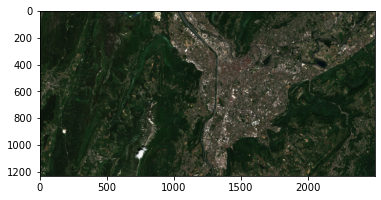

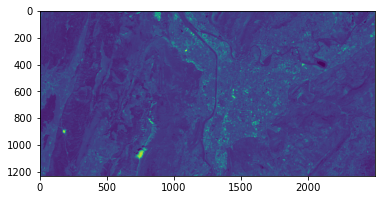

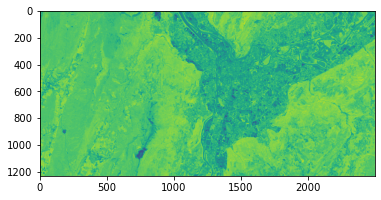

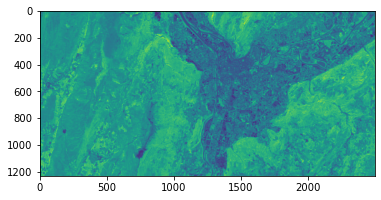

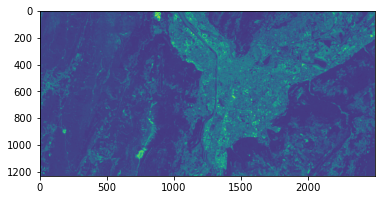

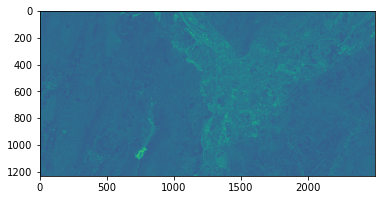

In [15]:
#affichage de l'image originale
plt.imshow(RGB1)
plt.show()
#affichage des images projettées selon chaque vecteur propre (5)
plt.imshow(v1[:,:,0])
plt.show()
plt.imshow(v1[:,:,1])
plt.show()
plt.imshow(v1[:,:,2])
plt.show()
plt.imshow(v1[:,:,3])
plt.show()
plt.imshow(v1[:,:,4])
plt.show()
#affichage selon les deux vecteurs propres principaux plus d'un vecteur propre autre 
plt.imshow(v1[:,:,0:3])
plt.show()

# téléchargement automatique d'images

In [18]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

user = 'pierrech'
password = 'Nherti1707'
File_depository = 'your file'

# connect to the API
api = SentinelAPI(user, password, 'https://apihub.copernicus.eu/apihub')


# search by polygon, time, and Hub query keywords
footprint = geojson_to_wkt(read_geojson('map.geojson'))
products = api.query(footprint,
                     date = ('20200101', date(2020, 1, 11)),
                     platformname = 'Sentinel-2',
                     cloudcoverpercentage = (0, 30))

# download all results from the search
api.download_all(products,File_depository)

ModuleNotFoundError: No module named 'sentinelsat'